## 1-Forward feature selection

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('D:\\train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [4]:
x = df.drop(['price_range'], axis=1).copy()
y = df['price_range'].copy(deep=False)
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [5]:
for i in range(len(y)):
  if y[i] > 1:
    y[i] = 1
  else:
      y[i] = 0
y        

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [7]:
sc = StandardScaler()
x_train[x_train.columns] = sc.fit_transform(x_train[x_train.columns])
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1490,-0.533125,1.010051,-0.870704,-1.027889,0.147113,-1.047371,-1.111010,0.003019,-1.077094,-0.684765,0.659366,-0.705366,-1.345086,0.143168,-1.754661,-1.091422,-1.662044,-1.804250,0.998751,-1.011314
965,0.299789,-0.990050,-1.237895,0.972868,-0.763452,-1.047371,-0.724511,-0.687152,-0.169903,1.492548,1.155519,-0.588049,-1.363886,1.652154,-0.330038,-0.863538,1.455721,-1.804250,0.998751,0.988813
1216,-0.205909,-0.990050,-0.993101,0.972868,-0.763452,0.954772,-0.172371,0.693191,-0.481750,-1.120227,1.651672,-0.759513,1.279770,-0.556800,1.094586,0.731650,0.722130,0.554247,-1.001251,0.988813
500,0.068678,1.010051,-1.237895,0.972868,-0.763452,-1.047371,1.207979,-1.377323,-1.020395,1.492548,0.990135,-0.150365,-1.178242,-0.917502,-1.279787,-1.091422,1.639119,-1.804250,-1.001251,0.988813
403,0.521747,1.010051,-0.381114,0.972868,-0.991093,0.954772,1.263193,-1.377323,0.879036,-0.249302,-0.829092,2.241104,0.974281,-0.568916,0.144837,0.503766,-1.478646,0.554247,-1.001251,0.988813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,-1.533080,1.010051,1.332447,0.972868,-0.535811,0.954772,1.373621,-1.032238,0.623889,1.492548,-0.332939,0.851345,0.426751,-0.810317,0.619711,-0.635654,-1.111850,0.554247,-1.001251,0.988813
772,-1.537657,-0.990050,-0.870704,-1.027889,-0.991093,0.954772,-0.282799,-1.377323,-0.538450,-1.120227,-0.994476,0.246709,0.626494,-0.578237,1.332023,0.047998,-0.561656,0.554247,-1.001251,0.988813
1848,1.244827,1.010051,-0.625909,-1.027889,-0.308169,0.954772,1.649691,-0.687152,0.850686,1.057085,-0.332939,2.207263,1.554711,0.394821,1.332023,1.871071,0.722130,0.554247,-1.001251,0.988813
1231,-1.215017,1.010051,-1.237895,0.972868,-0.080528,-1.047371,-1.221438,0.348105,1.644478,-1.555690,-0.829092,-0.971587,-0.341672,-1.352769,-0.567475,0.275882,0.722130,-1.804250,0.998751,-1.011314


In [8]:
x_test[x_test.columns] = sc.transform(x_test[x_test.columns])
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
541,-1.041111,-0.990050,-0.381114,0.972868,-0.763452,0.954772,0.324555,0.348105,1.020785,-0.249302,-0.498323,1.304821,1.324419,0.931681,-1.517224,-1.091422,0.171936,0.554247,0.998751,0.988813
1211,-1.224170,1.010051,0.108475,-1.027889,0.602396,0.954772,-1.663150,-0.342066,1.162533,1.492548,-0.167555,1.270980,0.297505,-1.541974,-0.567475,0.047998,-1.295248,0.554247,0.998751,0.988813
1862,-0.469055,-0.990050,1.454845,-1.027889,-0.308169,-1.047371,-0.172371,-1.032238,-1.615739,1.492548,1.155519,0.540003,-0.842204,-0.891405,-1.754661,-0.635654,-0.561656,0.554247,-1.001251,-1.011314
1094,-1.281375,1.010051,-0.013923,-1.027889,-0.991093,-1.047371,-1.663150,1.728448,-1.445641,-0.684765,-1.325245,-0.849757,-0.898602,-1.629587,-1.754661,-0.863538,-0.561656,0.554247,0.998751,0.988813
465,0.766587,1.010051,0.108475,-1.027889,0.147113,0.954772,0.545411,1.038277,-0.623499,-0.684765,-0.002171,-0.840733,-0.915052,1.409822,0.382274,0.959534,-0.378258,0.554247,-1.001251,-1.011314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-0.844324,1.010051,1.210050,-1.027889,1.512961,0.954772,-1.000581,0.693191,-1.615739,0.621623,0.824751,-0.551951,-0.344022,-1.668733,0.857149,0.959534,-1.662044,0.554247,-1.001251,0.988813
985,-0.411849,-0.990050,-0.993101,0.972868,1.057678,-1.047371,1.042337,0.003019,-0.453401,-0.249302,0.824751,1.708664,1.547661,-1.481391,-0.092601,0.503766,-0.928452,0.554247,0.998751,-1.011314
736,-1.704697,-0.990050,1.210050,-1.027889,-0.308169,-1.047371,1.373621,0.348105,1.275932,0.621623,0.163214,0.294087,0.093063,-1.709743,-0.330038,0.503766,0.905528,-1.804250,-1.001251,0.988813
21,1.054904,1.010051,0.720461,-1.027889,-0.763452,-1.047371,-1.055795,1.728448,0.453790,-1.120227,-1.325245,0.736284,0.313955,1.065896,1.094586,-1.091422,0.722130,0.554247,-1.001251,-1.011314


In [9]:
x = pd.concat([x_train, x_test]).sort_index()
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.928988,-0.990050,0.842858,-1.027889,-0.763452,-1.047371,-1.387080,0.348105,1.360981,-1.120227,-1.325245,-1.416039,-1.164143,0.381773,-0.804912,0.275882,1.455721,-1.804250,-1.001251,0.988813
1,-0.519396,1.010051,-1.237895,0.972868,-0.991093,0.954772,1.152765,0.693191,-0.113204,-0.684765,-0.663708,0.580612,1.730954,0.458201,1.094586,-0.635654,-0.745054,0.554247,0.998751,-1.011314
2,-1.567404,1.010051,-1.237895,0.972868,-0.535811,0.954772,0.490197,1.383362,0.141943,0.186160,-0.663708,1.388297,1.091777,0.432103,-0.330038,-0.863538,-0.378258,0.554247,0.998751,-1.011314
3,-1.448416,1.010051,1.210050,-1.027889,-0.991093,-1.047371,-1.221438,1.038277,-0.254953,0.621623,-0.167555,1.282260,1.256271,0.586823,0.857149,0.503766,-0.011462,0.554247,-1.001251,-1.011314
4,1.311185,1.010051,-0.381114,-1.027889,1.968244,0.954772,0.655839,0.348105,0.028545,-1.120227,0.659366,1.264212,-0.092581,-0.678898,-1.042350,-0.863538,0.722130,0.554247,0.998751,-1.011314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.038823,1.010051,-1.237895,0.972868,-0.991093,0.954772,-1.663150,1.038277,-0.963695,0.621623,0.659366,1.295797,1.500662,-1.371410,0.144837,-0.407770,1.455721,0.554247,0.998751,-1.011314
1996,1.640690,1.010051,1.332447,0.972868,-0.991093,-1.047371,0.379769,-1.032238,1.332631,-0.249302,-1.159861,0.603173,1.676906,-0.100096,-0.330038,0.959534,0.905528,0.554247,0.998751,0.988813
1997,1.517125,-0.990050,-0.748306,0.972868,-0.763452,0.954772,0.214127,0.693191,-0.906996,1.492548,-1.159861,0.497137,0.894384,0.855253,-0.804912,-1.091422,-1.111850,0.554247,0.998751,-1.011314
1998,0.604123,-0.990050,-0.748306,-1.027889,-0.080528,0.954772,0.766267,-1.377323,0.141943,0.186160,-0.829092,-0.703110,-1.366235,-1.184068,1.332023,0.959534,1.455721,0.554247,0.998751,0.988813


In [10]:
from sklearn import metrics

In [11]:
def forward_selection(x, y):
  features = []
  final_features = {'features': [], 'scores': []}
  rem_features = x.columns
  for i in range(len(x.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in rem_features:
      new_x = x[features + [feature]]
      x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=21)
      logisticregression = LogisticRegression()
      logisticregression.fit(x_train, y_train)
      y_pred = logisticregression.predict(x_test)
      score = metrics.roc_auc_score(y_test, y_pred)

      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    rem_features = rem_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
    
  final_features['features_rank'] = range(len(x.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features

In [12]:
final_features = forward_selection(x, y)
final_features

{'features': ['ram',
  'battery_power',
  'px_height',
  'px_width',
  'mobile_wt',
  'dual_sim',
  'blue',
  'clock_speed',
  'n_cores',
  'talk_time',
  'three_g',
  'int_memory',
  'fc',
  'm_dep',
  'pc',
  'sc_h',
  'sc_w',
  'wifi',
  'touch_screen',
  'four_g'],
 'scores': [0.9241357636706474,
  0.9388434946574482,
  0.9786926461345067,
  0.985669390320553,
  0.9953488372093023,
  0.9953488372093023,
  0.9953488372093023,
  0.9953488372093023,
  0.9953488372093023,
  0.9953488372093023,
  0.9953488372093023,
  0.9953488372093023,
  0.9930232558139536,
  0.9930232558139536,
  0.9953488372093023,
  0.9930232558139536,
  0.9930232558139536,
  0.9906976744186047,
  0.9903205531112508,
  0.9876178504085482],
 'features_rank': range(0, 20),
 'best_features': ['ram', 'battery_power', 'px_height', 'px_width']}

In [13]:
best_features = final_features['best_features']

## 2-Train

In [14]:
x = x[best_features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [15]:
logisticregression = LogisticRegression()
logisticregression.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_pred = logisticregression.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       215
           1       0.97      0.99      0.98       185

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400



## 3-PCA

In [18]:
df = pd.read_csv('D:\\train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [19]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [20]:
for i in range(len(y)):
  if y[i] > 1:
    y[i] = 1
  else:
      y[i] = 0
y        

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [22]:
sc = StandardScaler()
x_train[x_train.columns] = sc.fit_transform(x_train[x_train.columns])
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1490,-0.533125,1.010051,-0.870704,-1.027889,0.147113,-1.047371,-1.111010,0.003019,-1.077094,-0.684765,0.659366,-0.705366,-1.345086,0.143168,-1.754661,-1.091422,-1.662044,-1.804250,0.998751,-1.011314
965,0.299789,-0.990050,-1.237895,0.972868,-0.763452,-1.047371,-0.724511,-0.687152,-0.169903,1.492548,1.155519,-0.588049,-1.363886,1.652154,-0.330038,-0.863538,1.455721,-1.804250,0.998751,0.988813
1216,-0.205909,-0.990050,-0.993101,0.972868,-0.763452,0.954772,-0.172371,0.693191,-0.481750,-1.120227,1.651672,-0.759513,1.279770,-0.556800,1.094586,0.731650,0.722130,0.554247,-1.001251,0.988813
500,0.068678,1.010051,-1.237895,0.972868,-0.763452,-1.047371,1.207979,-1.377323,-1.020395,1.492548,0.990135,-0.150365,-1.178242,-0.917502,-1.279787,-1.091422,1.639119,-1.804250,-1.001251,0.988813
403,0.521747,1.010051,-0.381114,0.972868,-0.991093,0.954772,1.263193,-1.377323,0.879036,-0.249302,-0.829092,2.241104,0.974281,-0.568916,0.144837,0.503766,-1.478646,0.554247,-1.001251,0.988813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,-1.533080,1.010051,1.332447,0.972868,-0.535811,0.954772,1.373621,-1.032238,0.623889,1.492548,-0.332939,0.851345,0.426751,-0.810317,0.619711,-0.635654,-1.111850,0.554247,-1.001251,0.988813
772,-1.537657,-0.990050,-0.870704,-1.027889,-0.991093,0.954772,-0.282799,-1.377323,-0.538450,-1.120227,-0.994476,0.246709,0.626494,-0.578237,1.332023,0.047998,-0.561656,0.554247,-1.001251,0.988813
1848,1.244827,1.010051,-0.625909,-1.027889,-0.308169,0.954772,1.649691,-0.687152,0.850686,1.057085,-0.332939,2.207263,1.554711,0.394821,1.332023,1.871071,0.722130,0.554247,-1.001251,0.988813
1231,-1.215017,1.010051,-1.237895,0.972868,-0.080528,-1.047371,-1.221438,0.348105,1.644478,-1.555690,-0.829092,-0.971587,-0.341672,-1.352769,-0.567475,0.275882,0.722130,-1.804250,0.998751,-1.011314


In [23]:
x_test[x_test.columns] = sc.transform(x_test[x_test.columns])

In [24]:
x = pd.concat([x_train, x_test]).sort_index()
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.928988,-0.990050,0.842858,-1.027889,-0.763452,-1.047371,-1.387080,0.348105,1.360981,-1.120227,-1.325245,-1.416039,-1.164143,0.381773,-0.804912,0.275882,1.455721,-1.804250,-1.001251,0.988813
1,-0.519396,1.010051,-1.237895,0.972868,-0.991093,0.954772,1.152765,0.693191,-0.113204,-0.684765,-0.663708,0.580612,1.730954,0.458201,1.094586,-0.635654,-0.745054,0.554247,0.998751,-1.011314
2,-1.567404,1.010051,-1.237895,0.972868,-0.535811,0.954772,0.490197,1.383362,0.141943,0.186160,-0.663708,1.388297,1.091777,0.432103,-0.330038,-0.863538,-0.378258,0.554247,0.998751,-1.011314
3,-1.448416,1.010051,1.210050,-1.027889,-0.991093,-1.047371,-1.221438,1.038277,-0.254953,0.621623,-0.167555,1.282260,1.256271,0.586823,0.857149,0.503766,-0.011462,0.554247,-1.001251,-1.011314
4,1.311185,1.010051,-0.381114,-1.027889,1.968244,0.954772,0.655839,0.348105,0.028545,-1.120227,0.659366,1.264212,-0.092581,-0.678898,-1.042350,-0.863538,0.722130,0.554247,0.998751,-1.011314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.038823,1.010051,-1.237895,0.972868,-0.991093,0.954772,-1.663150,1.038277,-0.963695,0.621623,0.659366,1.295797,1.500662,-1.371410,0.144837,-0.407770,1.455721,0.554247,0.998751,-1.011314
1996,1.640690,1.010051,1.332447,0.972868,-0.991093,-1.047371,0.379769,-1.032238,1.332631,-0.249302,-1.159861,0.603173,1.676906,-0.100096,-0.330038,0.959534,0.905528,0.554247,0.998751,0.988813
1997,1.517125,-0.990050,-0.748306,0.972868,-0.763452,0.954772,0.214127,0.693191,-0.906996,1.492548,-1.159861,0.497137,0.894384,0.855253,-0.804912,-1.091422,-1.111850,0.554247,0.998751,-1.011314
1998,0.604123,-0.990050,-0.748306,-1.027889,-0.080528,0.954772,0.766267,-1.377323,0.141943,0.186160,-0.829092,-0.703110,-1.366235,-1.184068,1.332023,0.959534,1.455721,0.554247,0.998751,0.988813


In [25]:
pca = PCA(n_components=4)
pca.fit_transform(x)
pca.n_components_

4

## 4-Train

In [26]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=0.2, random_state=21)

In [27]:
logisticregression.fit(x_train_new, y_train_new)
y_pred_new = logisticregression.predict(x_test_new)

In [28]:
print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       215
           1       0.98      0.99      0.99       185

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



## 6-Feature Engineering

### A - Binning

In [29]:
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('D:\\train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [99]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

In [100]:
min_bp = x['battery_power'].min()
max_bp = x['battery_power'].max()

In [101]:
bins = np.linspace(min_bp,max_bp,4)
labels = ['low', 'medium', 'high']

In [102]:
x['battery_power'] = pd.cut(x['battery_power'], bins=bins, labels=labels, include_lowest=True)
x['battery_power']

0          low
1       medium
2          low
3          low
4         high
         ...  
1995       low
1996      high
1997      high
1998      high
1999       low
Name: battery_power, Length: 2000, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

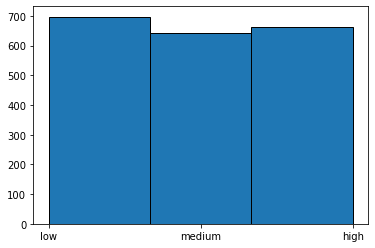

In [103]:
plt.hist(x['battery_power'], edgecolor='black',bins=3);

In [104]:
binned = x.copy()

In [56]:
x = df.drop(['price_range'], axis=1)

In [57]:
bins = np.linspace(min_bp,max_bp,6)
labels = ['very low', 'low', 'medium', 'high', 'very high']

In [58]:
x['battery_power'] = pd.cut(x['battery_power'], bins=bins, labels=labels, include_lowest=True)
x['battery_power']

0             low
1             low
2        very low
3        very low
4       very high
          ...    
1995     very low
1996    very high
1997    very high
1998         high
1999     very low
Name: battery_power, Length: 2000, dtype: category
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

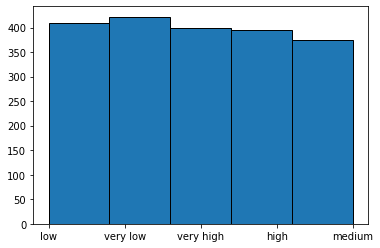

In [59]:
plt.hist(x['battery_power'], edgecolor='black',bins=5);

In [67]:
x = df.drop(['price_range'], axis=1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [68]:
bins=[500, 800, 1000, 1200, 1500, 1999]
labels = ['very low', 'low', 'medium', 'high', 'very high']

In [69]:
x['battery_power'] = pd.cut(x['battery_power'], bins=bins, labels=labels, include_lowest=True)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,low,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,medium,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,very low,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,very low,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,very high,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,very low,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,very high,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,very high,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,very high,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


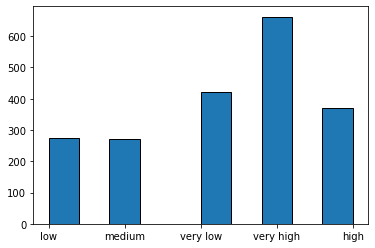

In [71]:
plt.hist(x['battery_power'], edgecolor='black');

### B - One hot encoding

In [73]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

min_value = x['battery_power'].min()
max_value = x['battery_power'].max()

bins = np.linspace(min_value,max_value,4)

labels = ['low', 'medium', 'high']

x['battery_power'] = pd.cut(x['battery_power'], bins=bins, labels=labels, include_lowest=True)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,low,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,medium,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,low,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,low,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,high,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,low,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,high,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,high,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,high,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [84]:
dummies = pd.get_dummies(x['battery_power'], prefix='battery_power')
x = x.join(dummies)
x.drop(['battery_power'], inplace=True, axis=1)
x

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,battery_power_low,battery_power_medium,battery_power_high
0,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,0,0
1,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,0,1,0
2,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,1,0,0
3,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1,0,0
4,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,1,0,0
1996,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,0,0,1
1997,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,0,0,1
1998,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,0,1


In [85]:
encoded = x.copy()



> ***why do we use One-Hot encoding***



**What is the Problem with Categorical Data?**

Some algorithms can work with categorical data directly,
For example decision tree algorithm.

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be **numeric**.

This means that categorical data must be converted to a numerical form.

**How to Convert Categorical Data to Numerical Data?**

This involves two steps:

1.   Integer Encoding

As a first step, each unique category value is assigned an integer value.
For example, “red” is 1, “green” is 2, and “blue” is 3.
2.   One-Hot Encoding

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/


### C - Transformation

In [86]:
x = df.drop(['price_range'], axis=1)
y = df['price_range']

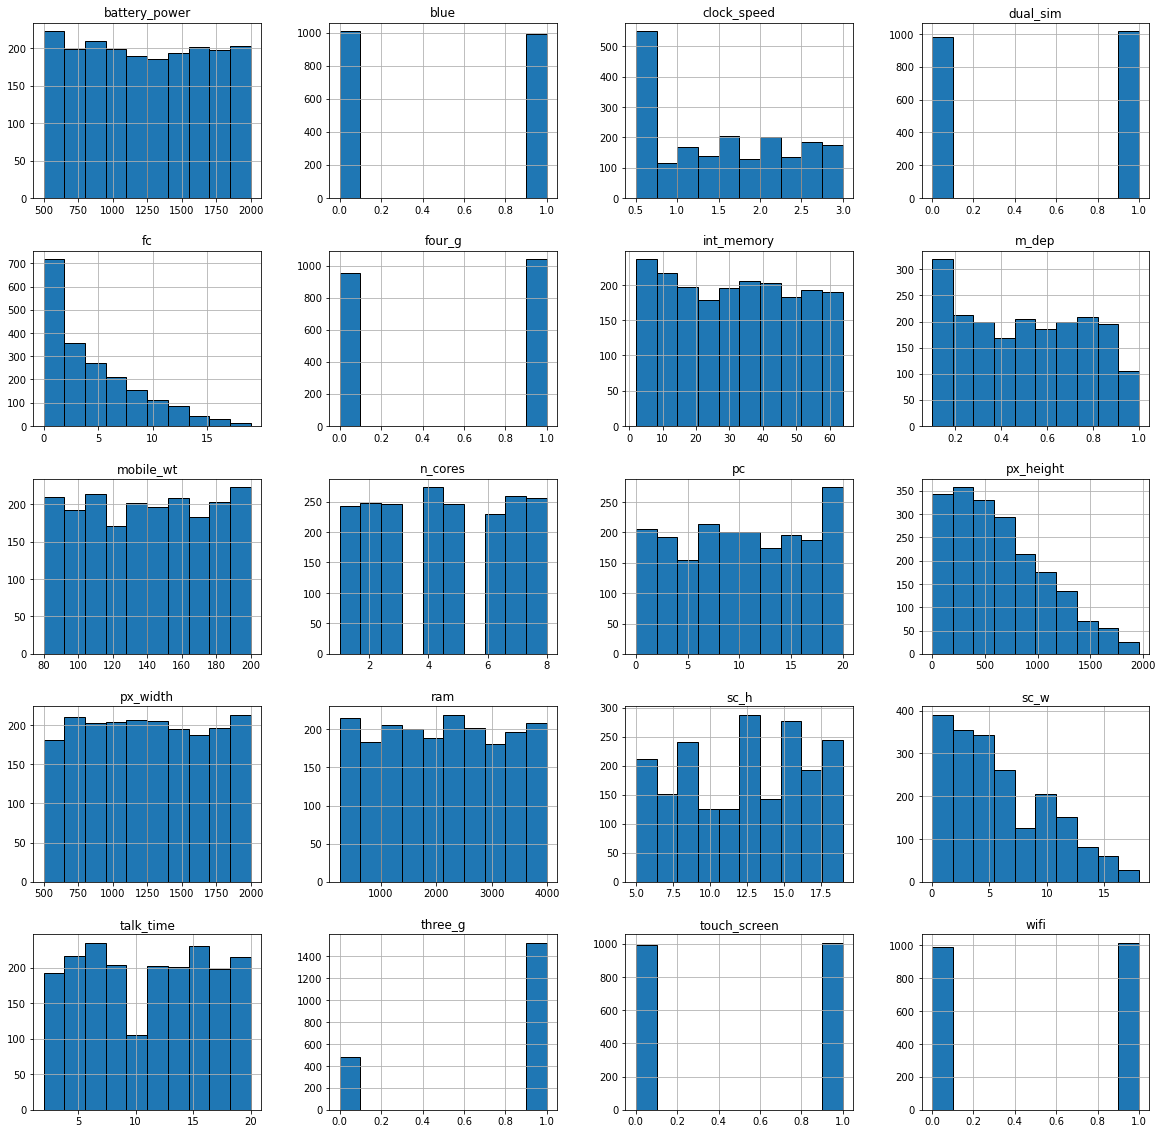

In [88]:
x.hist(edgecolor="black", figsize=(20, 20))
plt.show()

In [89]:
x['fc'] = np.log(x['fc']+1)
x['px_height'] = np.log(x['px_height']+1)
x['sc_w'] = np.log(x['sc_w']+1)

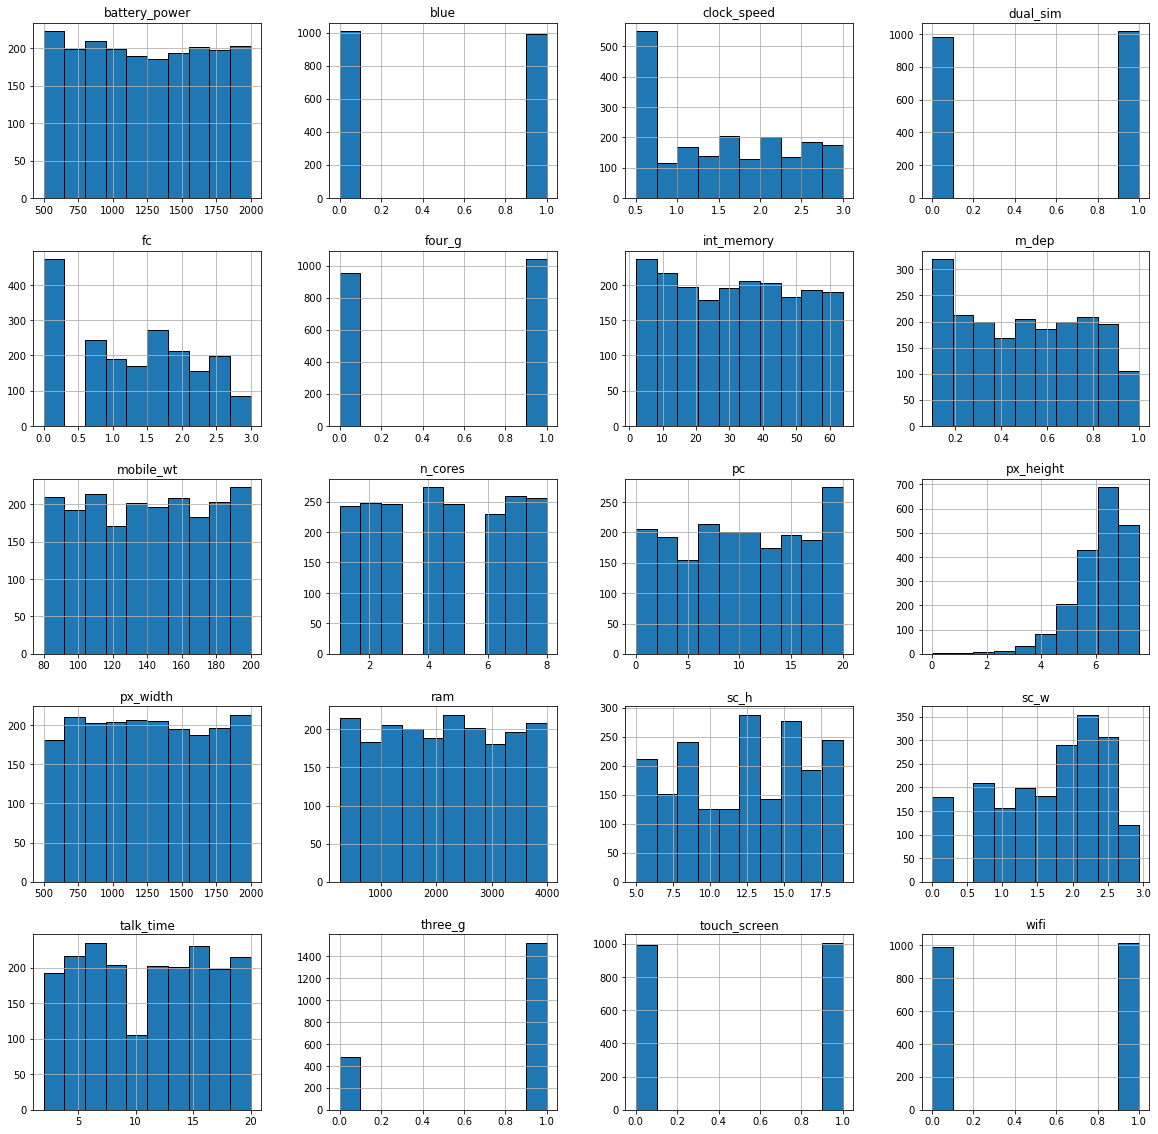

In [91]:
x.hist(edgecolor="black", figsize=(20, 20))
plt.show()

In [92]:
transformed = x.copy()

### D - New Feature

In [93]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [94]:
df['mobile_volume'] = df['sc_w'] * df['sc_h'] * df['m_dep']
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,mobile_volume
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,37.8
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,35.7
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,19.8
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,102.4
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,41.6
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,22.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,6.3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,18.0


In [95]:
df[['sc_h','sc_h','m_dep','mobile_volume']]

,sc_h,sc_h,m_dep,mobile_volume
0,9,9,0.6,37.8
1,17,17,0.7,35.7
2,11,11,0.9,19.8
3,16,16,0.8,102.4
4,8,8,0.6,9.6
...,...,...,...,...
1995,13,13,0.8,41.6
1996,11,11,0.2,22.0
1997,9,9,0.7,6.3
1998,18,18,0.1,18.0


In [96]:
new_feature = df.drop(columns='price_range').copy()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,mobile_volume
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,37.8
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,35.7
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,19.8
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,102.4
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,41.6
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,22.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,6.3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,18.0


## 7-SVM

In [97]:
from sklearn.svm import SVC

In [115]:
x_train, x_test, y_train, y_test = train_test_split(encoded, y, test_size=0.2, random_state=21)

In [116]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.90       120
           1       0.72      0.79      0.75        95
           2       0.72      0.70      0.71        90
           3       0.86      0.88      0.87        95

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.82       400



In [117]:
x_train, x_test, y_train, y_test = train_test_split(transformed, y, test_size=0.2, random_state=21)

In [118]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.94       120
           1       0.86      0.89      0.88        95
           2       0.88      0.88      0.88        90
           3       0.94      0.95      0.94        95

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [119]:
x_train, x_test, y_train, y_test = train_test_split(new_feature, y, test_size=0.2, random_state=21)

In [120]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       120
           1       0.93      0.98      0.95        95
           2       0.94      0.91      0.93        90
           3       0.95      0.97      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## 8-Bootsrapping

Bootstrap resamples with replacement (and usually produces new "surrogate" datasets with the same number of cases as the original data set). Due to the drawing with replacement, a bootstrapped data set may contain multiple instances of the same original cases, and may completely omit other original cases.

Cross validation resamples without replacement and thus produces surrogate data sets that are smaller than the original. These data sets are produced in a systematic way so that after a pre-specified number k of surrogate data sets, each of the n original cases has been left out exactly once. This is called k-fold cross validation or leave-x-out cross validation with x=n/k, e.g. leave-one-out cross validation omits 1 case for each surrogate set, i.e. k=n.

In summary, Cross validation splits the available dataset to create multiple datasets, and Bootstrapping method uses the original dataset to create multiple datasets after resampling with replacement. 

Bootstrapping it is not as strong as Cross validation when it is used for model validation. Bootstrapping is more about building ensemble models or just estimating parameters.


## 9- 5*2 Cross validation

5x2 cross validation refers to a 5 repetition of a 2-fold. First step is to split data into half, then repeat it 4 more times. The 5x2cv was popularised by the paper Approximate statistical tests for comparing supervised classification learning algorithms by Dietterich as a way of obtaining not only a good estimate of the generalisation error but also a good estimate of the variance of that error (in order to perform statistical tests)

## 10- Elbow method

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

In order to decrease the estimation error, we need to decrease both the bias and variance. We have to select a model (in our example the degree of the polynomial) that trades-off the bias and variance in such a way that error is minimized. The test error can be high both in the case of over-fitting and under-fitting. Hence, we need an optimal balance of both bias and variance so that our model neither overfits nor under fits our data.

**For clean and large enough dataset:**

* The greater the model complexity the lower the estimation error, the better the approximation.
* The greater the model complexity the lower the bias
* The greater the model complexity the lower the variance

**For noisy dataset:**

* Greater model complexity doesn’t mean lower estimation error
* The greater the model complexity the lower the bias
* The greater the model complexity the higher the variance

Since the dataset in the real world is almost always noisy and limited, hence we need to find the optimum complexity of the underlying model that gives us the minimum error on the dataset. Higher complexity doesn’t guarantee the best fit.